## Motive Correlations
Here we look to find correlation among the different murder motives.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data


In [2]:
excel_file = pd.read_excel("../Data/murder(2016-2021)/motives _regenerated/Motive(2016-2021)ref.xlsx",sheet_name=None)
excel_file.keys()

dict_keys(['Motive(2016)ref', 'Motive(2017)', 'Motive(2018)', 'Motive(2019)', 'Motive(2020)', 'Motive(2021)'])

### Data Cleaning and Preprocessing

In [3]:
sheets = list(excel_file.keys())
motive_2016 = excel_file[sheets[0]]
motive_2017 = excel_file[sheets[1]]
motive_2018 = excel_file[sheets[2]]
motive_2019 = excel_file[sheets[3]]
motive_2020 = excel_file[sheets[4]]
motive_2021 = excel_file[sheets[5]]

In [4]:
motive_2021.columns

Index(['Sl. No. Col. (1)', 'State/UT Col. (2)', 'Gain - Col. (3)',
       'Personal Vendetta or Enmity - Col. (4)', 'Dowry - Col. (5)',
       'Witchcraft - Col. (6)', 'Child/ Human Sacrifice - Col. (7)',
       'Communal/ Religious - Col. (8)', 'Casteism - Col. (9)',
       'Class Conflict - Col. (10)', 'For Political Reason - Col. (11)',
       'Honour Killing - Col. (12)', 'Love Affairs - Col. (13)',
       'Illicit Relationship - Col. (14)', 'Extremism/ Insurgency - Col. (15)',
       'During Dacoity/ Robbery - Col. (16)', 'Gang Rivalry - Col. (17)',
       'Psychopath/Serial Killers - Col. (18)',
       'Sale of Body Parts - Col. (19)',
       'Disputes - Property/ Land Dispute - Col. (21)',
       'Disputes - Family Dispute - Col. (22)',
       'Disputes - Petty Quarrel/ Dispute - Col. (23)',
       'Disputes - Money Dispute - Col. (24)',
       'Disputes - Water Dispute - Col. (25)',
       'Disputes - Due to Accidents on Roads - Col. (26)',
       'Blind Murder/No Clue/Motive N

In [5]:
data_2016 = motive_2016[['State/UT','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2017 = motive_2017[['State/UT','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2018 = motive_2018[['State/UT','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2019 = motive_2019[['State/UT','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2020 = motive_2020[['State/UT (Col. 2)','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2021 = motive_2021[['State/UT Col. (2)','Region Pop(in_bill)','Greed_Reg','Loath_Reg','Love_adj','Year']]

In [6]:
renaming_cols = {'State/UT (Col. 2)' : 'State/UT',
                 'State/UT Col. (2)' : 'State/UT',
                 'Greed_Reg' : 'Greed_adg',
                 'Love_adj':'Love_adg',
                 'Loath_Reg':'Loath_adg'}

In [7]:
data_2016.rename(columns=renaming_cols,inplace=True)
data_2017.rename(columns=renaming_cols,inplace=True)
data_2018.rename(columns=renaming_cols,inplace=True)
data_2019.rename(columns=renaming_cols,inplace=True)
data_2020.rename(columns=renaming_cols,inplace=True)
data_2021.rename(columns=renaming_cols,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16260\1603358494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016.rename(columns=renaming_cols,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16260\1603358494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017.rename(columns=renaming_cols,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16260\1603358494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [8]:
motive_total = pd.concat([data_2016,data_2017,data_2018,data_2019,data_2020,data_2021],ignore_index=True)
motive_total.sample(10)

,State/UT,Region Pop(in_bill),Greed_adg,Loath_adg,Love_adg,Year
53,Mizoram,0.310,0.000000,25.806452,12.903226,2017
105,Delhi,1.024,50.781250,198.242188,44.921875,2018
149,Goa,1.209,4.962779,15.715467,4.962779,2020
161,Nagaland,0.310,6.451613,9.677419,3.225806,2020
137,A & N Islands,1.024,7.812500,4.882812,0.000000,2019
170,Uttarakhand,2.154,18.570102,6.035283,10.677809,2020
138,Chandigarh,1.209,4.962779,8.271299,5.789909,2019
143,Puducherry,1.768,13.009050,3.393665,0.000000,2019
146,Assam,0.310,800.000000,1135.483871,100.000000,2020
37,Arunachal Pradesh,0.310,3.225806,45.161290,9.677419,2017


In [9]:
motive_total.rename(columns={'Greed_adg':'Greed','Loath_adg':'Loath','Love_adg':'Love'},inplace=True
                )
motive_total.sample(7)

,State/UT,Region Pop(in_bill),Greed,Loath,Love,Year
23,Tamil Nadu,1.768,162.330317,282.239819,174.208145,2016
193,Maharashtra,1.209,352.357320,730.355666,290.322581,2021
40,Chhattisgarh,2.154,45.961003,117.455896,44.568245,2017
16,Meghalaya,0.310,70.967742,87.096774,12.903226,2016
128,Punjab,1.024,291.015625,204.101562,90.820312,2019
30,Chandigarh,1.209,2.481390,0.000000,3.308519,2016
18,Nagaland,1.596,8.771930,6.265664,0.000000,2016


<Axes: >

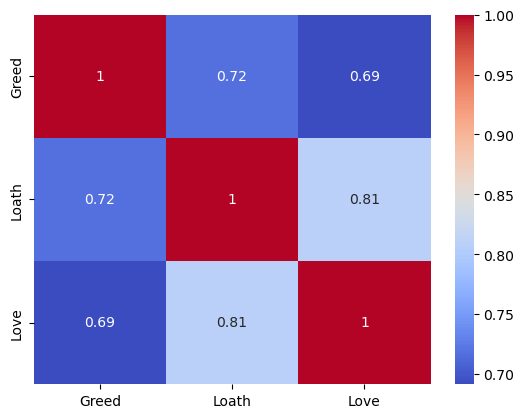

In [10]:
sns.heatmap(motive_total[['Greed','Loath','Love']].corr(),cmap='coolwarm',annot=True)

In [14]:
years  = list(motive_total.Year.unique())
year_corr = []

for i in range(0,len(years)):
    corr = motive_total[motive_total['Year'] == years[i]][['Greed','Loath','Love']].corr()
    year_corr.append(corr)
year_corr

[          Greed     Loath      Love
 Greed  1.000000  0.907356  0.691596
 Loath  0.907356  1.000000  0.823811
 Love   0.691596  0.823811  1.000000,
           Greed     Loath      Love
 Greed  1.000000  0.852016  0.802755
 Loath  0.852016  1.000000  0.912343
 Love   0.802755  0.912343  1.000000,
           Greed     Loath      Love
 Greed  1.000000  0.741086  0.792864
 Loath  0.741086  1.000000  0.952655
 Love   0.792864  0.952655  1.000000,
           Greed     Loath      Love
 Greed  1.000000  0.746761  0.925768
 Loath  0.746761  1.000000  0.781188
 Love   0.925768  0.781188  1.000000,
           Greed     Loath      Love
 Greed  1.000000  0.786393  0.620439
 Loath  0.786393  1.000000  0.789972
 Love   0.620439  0.789972  1.000000,
           Greed     Loath      Love
 Greed  1.000000  0.843801  0.733488
 Loath  0.843801  1.000000  0.721043
 Love   0.733488  0.721043  1.000000]

In [18]:
greed_loath = []
greed_love = []
loath_love = []
for i in range(0,len(years)):
    greed_loath.append(year_corr[i].iat[0,1])
    greed_love.append(year_corr[i].iat[0,2])
    loath_love.append(year_corr[i].iat[1,2])
    
(greed_loath, greed_love,loath_love)

([0.907356111382177,
  0.852015618947667,
  0.7410862456412545,
  0.7467605404401623,
  0.7863929244142517,
  0.8438012648661085],
 [0.6915955316522382,
  0.8027545594541889,
  0.7928643508272248,
  0.925767889335521,
  0.6204388303554632,
  0.7334882998839843],
 [0.8238111549145506,
  0.9123434818699132,
  0.9526553696649157,
  0.7811884280141816,
  0.7899720411939228,
  0.7210426194469296])

Text(0.5, 1.0, 'Correlation among murder motives from 2016 to 2021')

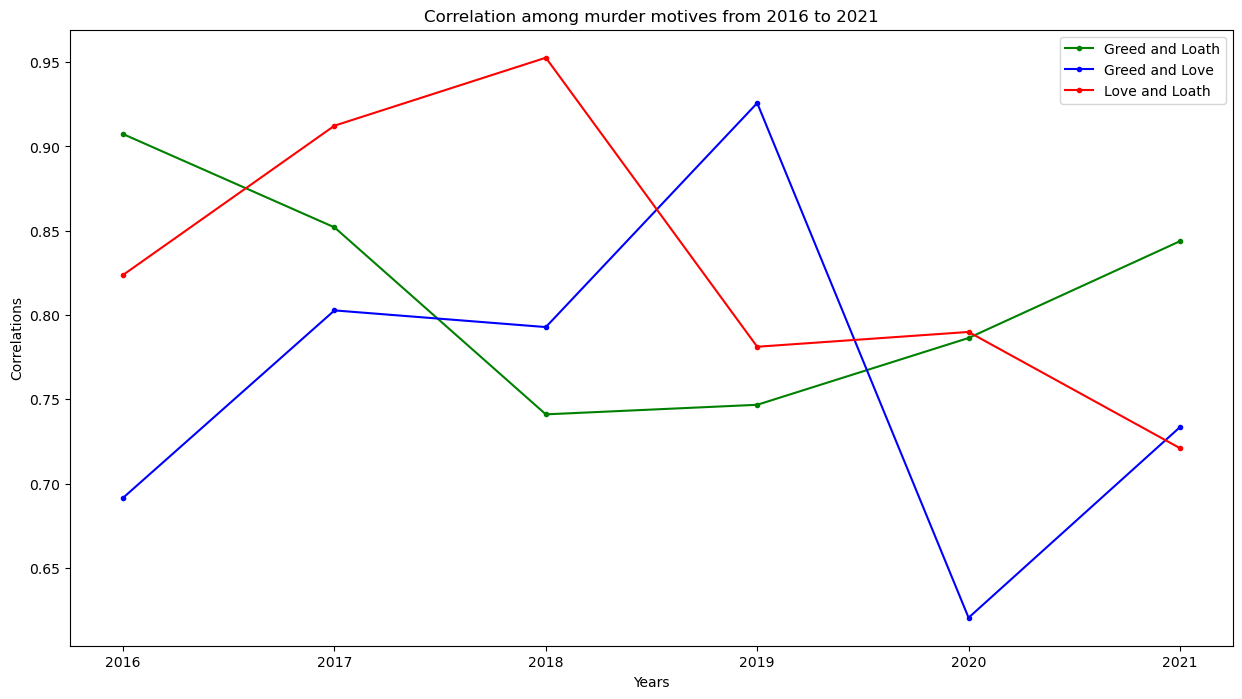

In [34]:
fig = plt.figure(figsize=(15,8))
# plt.subplot(1,3,1)
plt.plot(years, greed_loath, 'g.-',label='Greed and Loath')
# plt.ylabel('Correlation between Greed and Loath')
# plt.subplot(1,3,2)
plt.plot(years,greed_love, 'b.-',label='Greed and Love')
# plt.ylabel('Correlation between Greed and Love')
# plt.subplot(1,3,3)
plt.plot(years,loath_love, 'r.-',label='Love and Loath')
# plt.ylabel('Correlation between Love and Loath')
plt.ylabel('Correlations')
plt.xlabel('Years')
plt.legend()
plt.title("Correlation among murder motives from 2016 to 2021")